In [73]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from cvxopt import matrix as cvxopt_matrix
from cvxopt import solvers as cvxopt_solvers

In [74]:
df=pd.read_excel('proj2dataset.xlsx',header=None)
df=df.set_axis(['x1', 'x2', 'class'], axis='columns')
c1=df.where(df['class']==1).dropna()[['x1','x2']].values
c2=df.where(df['class']==-1).dropna()[['x1','x2']].values
X=df[['x1','x2']].values
y=df[['class']].values


In [75]:
C = 100
m,n = X.shape
Xy = y * X
H = np.dot(Xy , Xy.T)

P = cvxopt_matrix(H)
q = cvxopt_matrix(-np.ones((m, 1)))
G = cvxopt_matrix(np.vstack((np.eye(m)*-1,np.eye(m))))
h = cvxopt_matrix(np.hstack((np.zeros(m), np.ones(m) * C)))
A = cvxopt_matrix(y.T*1.0)
b = cvxopt_matrix(np.zeros(1))


In [76]:
sol = cvxopt_solvers.qp(P, q, G, h, A, b)

lambdas = np.array(sol['x'])
sol

     pcost       dcost       gap    pres   dres
 0: -5.4932e+02 -4.2084e+05  9e+05  4e-01  2e-12
 1:  6.8820e+02 -5.7081e+04  7e+04  2e-02  2e-12
 2: -9.1507e+02 -9.4779e+03  9e+03  1e-03  2e-12
 3: -1.1924e+03 -3.5741e+03  2e+03  3e-04  1e-12
 4: -1.3212e+03 -2.9275e+03  2e+03  2e-04  2e-12
 5: -1.5022e+03 -2.3621e+03  9e+02  7e-05  2e-12
 6: -1.5418e+03 -2.0376e+03  5e+02  2e-05  2e-12
 7: -1.6267e+03 -1.9147e+03  3e+02  6e-06  2e-12
 8: -1.6173e+03 -1.8515e+03  2e+02  2e-06  2e-12
 9: -1.6603e+03 -1.8036e+03  1e+02  8e-07  3e-12
10: -1.7124e+03 -1.7275e+03  2e+01  6e-08  3e-12
11: -1.7174e+03 -1.7193e+03  2e+00  7e-09  2e-12
12: -1.7182e+03 -1.7182e+03  2e-02  7e-11  3e-12
13: -1.7182e+03 -1.7182e+03  2e-04  7e-13  3e-12
Optimal solution found.


{'x': <100x1 matrix, tc='d'>,
 'y': <1x1 matrix, tc='d'>,
 's': <200x1 matrix, tc='d'>,
 'z': <200x1 matrix, tc='d'>,
 'status': 'optimal',
 'gap': 0.00018538588745784478,
 'relative gap': 1.0789666494303205e-07,
 'primal objective': -1718.1799600175405,
 'dual objective': -1718.1801453950545,
 'primal infeasibility': 6.598450803323163e-13,
 'dual infeasibility': 2.7490784148825808e-12,
 'primal slack': 1.500239606377506e-07,
 'dual slack': 8.762109207093257e-09,
 'iterations': 13}

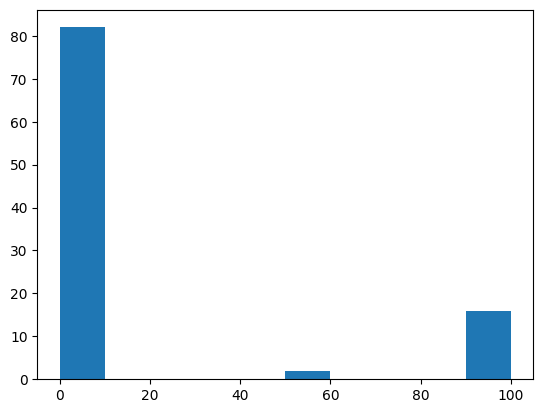

In [77]:
plt.hist(lambdas)
plt.show()

In [78]:
w = np.matmul((y * lambdas).T,X).reshape(-1,1)

Sv = ((lambdas>0.09999) ).flatten()
w0 = np.mean(y[Sv] - np.dot(X[Sv], w))

In [79]:
misclassed1=(np.dot(c1,w)+w0<0)
misclassed2=(np.dot(c2,w)+w0>=0)
misclassed=np.concatenate([misclassed1,misclassed2])

In [80]:
print(w.T,w0)

[[-0.94400942  1.12304005]] 0.1989603695055254


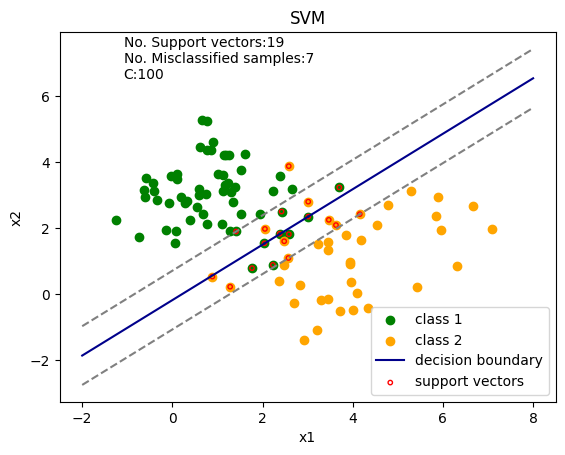

In [81]:

plt.scatter(x=c1.T[0],y=c1.T[1],c='green',label='class 1')
plt.scatter(x=c2.T[0],y=c2.T[1],c='orange',label='class 2')

x1 = np.linspace(-2,8)
plt.plot(x1, -(x1*w[0] +w0)/w[1], color = 'darkblue',label='decision boundary')
plt.plot(x1, -(x1*w[0] +w0 -1)/w[1], color = 'grey',linestyle='--')
plt.plot(x1, -(x1*w[0] +w0 +1)/w[1], color = 'grey',linestyle='--')
plt.scatter(X[Sv].T[0], X[Sv].T[1], s=10, facecolors='none', edgecolors='r',label='support vectors')


plt.annotate(f'No. Support vectors:{len(X[Sv])} \nNo. Misclassified samples:{len(y[misclassed])}\nC:{C}', xy=(2,4), xycoords='data',
            xytext=(-100,60), textcoords='offset points')

plt.title("SVM")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend(loc="lower right")
plt.show()
